In [ ]:
You will implement dimentionality reduction using PCA and fit Logistic Regression equation on the same, such that accuracy is modified

In [ ]:
Understand and practice principal component analysis using scikit learn.

In [ ]:
1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn]

In [15]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.data.shape

(1797, 64)

In [16]:
type(dataset.data[0])

numpy.ndarray

In [12]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 200x200 with 0 Axes>

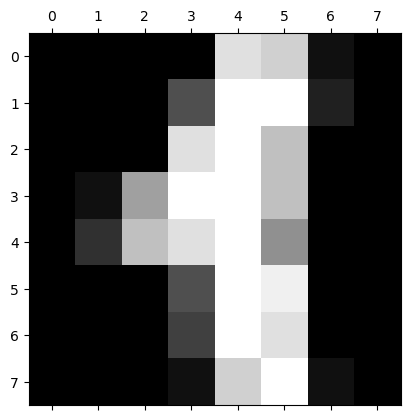

<Figure size 200x200 with 0 Axes>

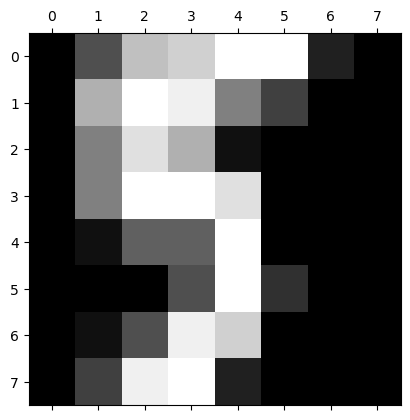

In [25]:
import matplotlib.pyplot as plt

def plot_8x8(arr1):
    #print(arr1)
    arr1=arr1.reshape(8,8)
    plt.gray()
    plt.matshow(arr1)
    
plot_8x8(dataset.data[11])
plot_8x8(dataset.data[15])

In [ ]:
2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [28]:
from sklearn.model_selection import train_test_split
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.shape

(1797, 64)

In [30]:
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [48]:
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = train_test_split(df,dataset.target,test_size=0.2)

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)
predictions = model1.predict(X_test)
model1.score(X_test,y_test)


0.9611111111111111

In [ ]:
3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]

In [49]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(df)
X_pca.shape


(1797, 29)

In [45]:
pca.n_components_

29

In [ ]:
4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]

In [50]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_pca,dataset.target,test_size=0.2)

from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train2,y_train2)
predictions2 = model2.predict(X_test2)
model2.score(X_test2,y_test2)

0.9555555555555556

In [51]:
print("Score before PCA",model1.score(X_test,y_test))
print("Score using PCA",model2.score(X_test2,y_test2))

Score before PCA 0.9611111111111111
Score using PCA 0.9555555555555556


In [ ]:
5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

Plot from Confusion Matrix before and after PCA


<Figure size 640x480 with 0 Axes>

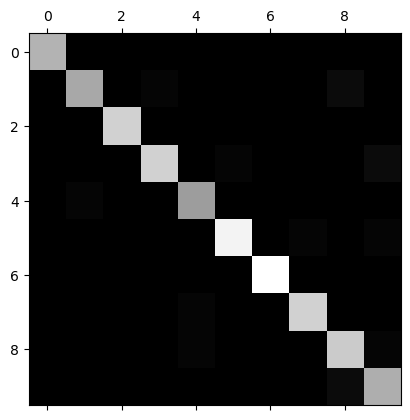

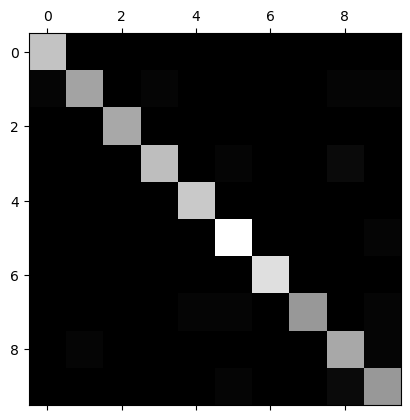

In [58]:
from sklearn import metrics

print("Plot from Confusion Matrix before and after PCA")
plt.gray()
plt.matshow(metrics.confusion_matrix(y_test,predictions))
plt.gray()
plt.matshow(metrics.confusion_matrix(y_test2,predictions2))



In [59]:
print("Confusion Matrix before PCA")
print(metrics.confusion_matrix(y_test,predictions))
print()
print("Confusion Matrix using PCA")
print(metrics.confusion_matrix(y_test2,predictions2))


Confusion Matrix before PCA
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  1  0  0  0  0  2  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  2]
 [ 0  1  0  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  1  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 36  0  0]
 [ 0  0  0  0  1  0  0  0 35  1]
 [ 0  0  0  0  0  0  0  0  2 30]]

Confusion Matrix using PCA
[[36  0  0  0  0  0  0  0  0  0]
 [ 1 30  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  2  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  1  1  0 28  0  1]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  0  0  1  0  0  2 28]]
